<a href="https://colab.research.google.com/github/a-very-risky-gamble/Accio-Alpha/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Exercise 1

# Predictors:
# X1 = GPA
# X2 = IQ
# X3 = Gender (1 = Female, 0 = Male)
# X4 = GPA * IQ
# X5 = GPA * Gender

beta_0 = 50      # Intercept
beta_1 = 20      # GPA
beta_2 = 0.07    # IQ
beta_3 = 35      # Gender
beta_4 = 0.01    # GPA * IQ interaction
beta_5 = -10     # GPA * Gender interaction


# Question 1:

# Salary difference (Female - Male):
# Gender = 1 for Female, 0 for Male
#
# Difference = beta_3 + beta_5 * GPA
#            = 35 - 10 * GPA
#
# This shows the effect of gender depends on GPA.
# Females earn more only for certain GPA values.
# Hence, option (d) is correct.

# Question 2:
# IQ = 110
# GPA = 4.0

GPA = 4.0
IQ = 110
Gender = 1

salary = (
    beta_0 +
    beta_1 * GPA +
    beta_2 * IQ +
    beta_3 * Gender +
    beta_4 * GPA * IQ +
    beta_5 * GPA * Gender
)

print("Predicted salary (in $1000s):", salary)

# Question 3:
#  False
# Even a small coefficient can have a large effect when
# multiplied by large values (e.g., GPA * IQ).
# Significance depends on scale and statistical testing,
# not just coefficient magnitude.


Predicted salary (in $1000s): 137.1


**2nd**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
auto = sm.datasets.get_rdataset("Auto", "ISLR").data
auto = auto.dropna()


In [3]:
X = auto['horsepower']
y = auto['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        12:57:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [4]:
new_X = pd.DataFrame({'const': [1], 'horsepower': [98]})

prediction = model.get_prediction(new_X)
print(prediction.summary_frame(alpha=0.05))


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


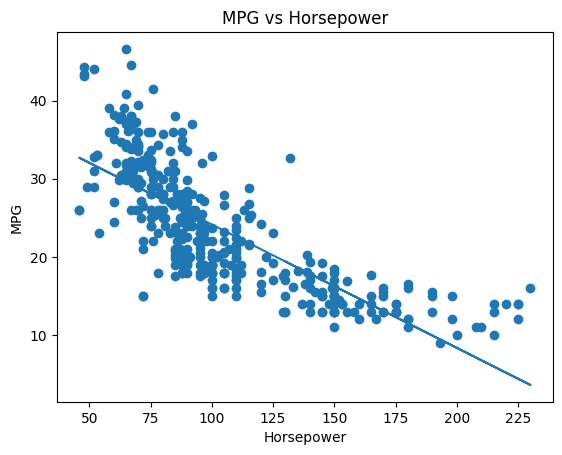

In [5]:
plt.scatter(auto['horsepower'], auto['mpg'])
plt.plot(auto['horsepower'], model.predict(X))
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")
plt.show()


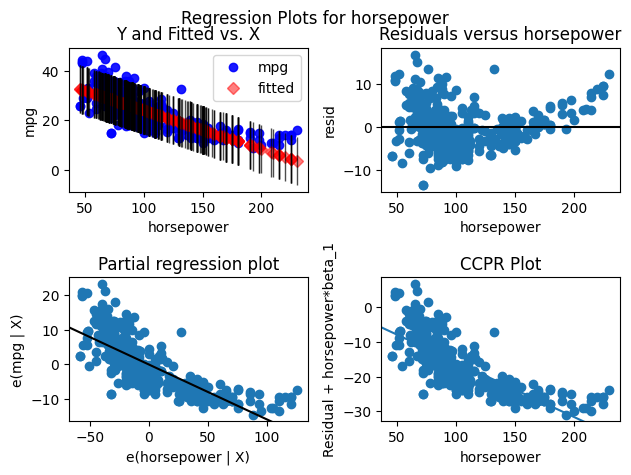

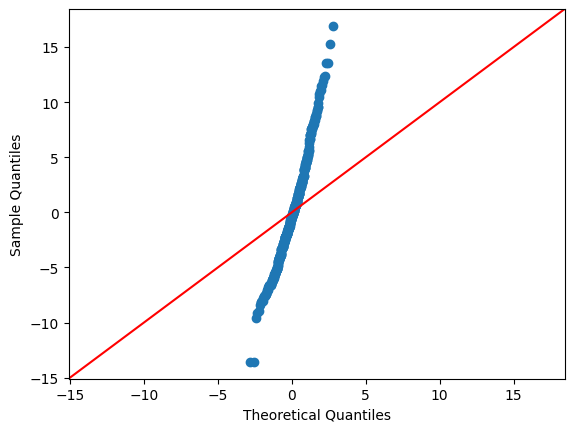

In [6]:
sm.graphics.plot_regress_exog(model, 'horsepower')
plt.show()

sm.qqplot(model.resid, line='45')
plt.show()


**3rd**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [11]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

Saving USD_CAD.csv to USD_CAD.csv


In [12]:
usd = pd.read_csv("USD_CAD.csv", index_col=0, parse_dates=True)
price = usd['Close']


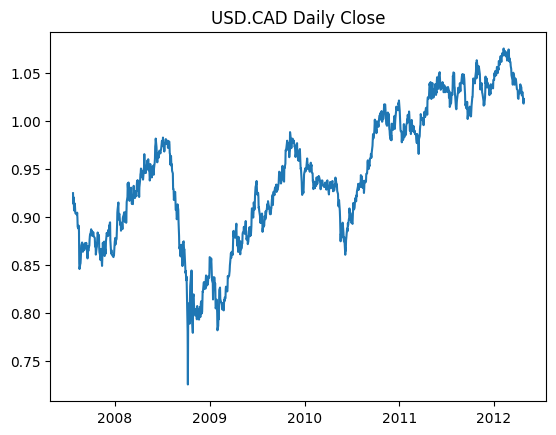

In [13]:
plt.plot(price)
plt.title("USD.CAD Daily Close")
plt.show()


In [14]:
log_price = np.log(price)

adf_result = adfuller(log_price, maxlag=1)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("90% Critical Value:", adf_result[4]['10%'])


ADF Statistic: -1.5416857197505023
p-value: 0.5127985567768013
90% Critical Value: -2.568017509711682


In [15]:
delta_y = log_price.diff().dropna()
y_lag = log_price.shift(1).dropna()

reg = sm.OLS(delta_y, sm.add_constant(y_lag)).fit()
lambda_ = reg.params[1]

half_life = np.log(2) / -lambda_
print("Half-life (days):", half_life)


Half-life (days): 139.32268024471367


/tmp/ipython-input-2579337885.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda_ = reg.params[1]


**4th**

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [20]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

Saving EWA_EWC.csv to EWA_EWC.csv


In [22]:
ewa = pd.read_csv("EWA_EWC.csv", index_col=0, parse_dates=True)['EWA']
ewc = pd.read_csv("EWA_EWC.csv", index_col=0, parse_dates=True)['EWC']

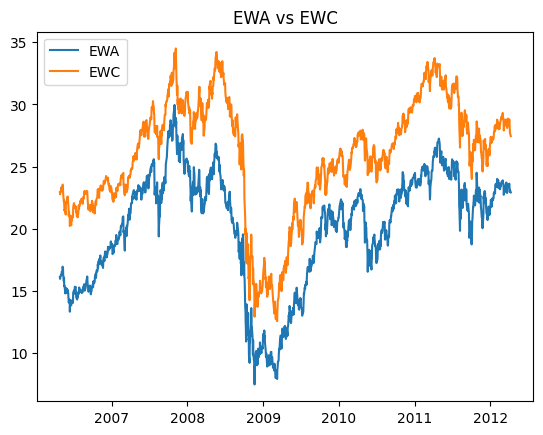

In [23]:
plt.plot(ewa, label='EWA')
plt.plot(ewc, label='EWC')
plt.legend()
plt.title("EWA vs EWC")
plt.show()


In [24]:
print("Correlation:", ewa.corr(ewc))


Correlation: 0.9575322660751621


In [30]:
X = sm.add_constant(ewc)
model = sm.OLS(ewa, X).fit()

beta = model.params['EWC']
print("Hedge Ratio (β):", beta)

Hedge Ratio (β): 0.9526600515607522


In [31]:
spread = ewa - beta * ewc


In [32]:
adf_spread = adfuller(spread, maxlag=1, regression='n')
print("ADF Statistic:", adf_spread[0])
print("p-value:", adf_spread[1])
print("95% Critical Value:", adf_spread[4]['5%'])


ADF Statistic: -1.290990801067245
p-value: 0.18156193385260744
95% Critical Value: -1.941180796004319


In [33]:
spread_lag = spread.shift(1).dropna()
delta_spread = spread.diff().dropna()

reg = sm.OLS(delta_spread, sm.add_constant(spread_lag)).fit()
lambda_ = reg.params.iloc[1]

half_life = np.log(2) / -lambda_
print("Half-life (days):", half_life)

Half-life (days): 27.95090884415411
